In [ ]:
# extraindo lat e lon usando metodo do GNC 


In [2]:
# IMPORTANDO PACOTES

import os
import numpy as np
import import_ipynb
import pandas as pd
import netCDF4 as nc
import xarray as xr
#import FuncaoProposta1 as fpl
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs           
import cartopy.io.shapereader as shpreader             

from datetime import datetime
from IPython.display import clear_output


In [3]:
# LOCAL PASTAS

# CAMINHO NETCDF DO GOES 16
# caminho_nc = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc/'

# #=============================== arquivo original amv INPE ==========
# CAMINHO_ARQUIVO_AMV_ORIG = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/CSV AMV INPE/'
#CAMINHO_ARQUIVO_AMV_ORIG = '/home/dissm/Área de Trabalho/MEGA/AMV/DADOS/REPROJ E EXTRA/CSV AMV INPE/'

# =-===== SETANDO CSV COM DATAS DOS EVENTOS SELECIONADOS ============
# # data_evento = pd.read_csv('DADOS/DATAS EVENTOS', sep = ',', header = 0,encoding = latin1' )
# data_evento = pd.read_csv('/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/DATAS EVENTOS_mod',
                        #    sep = ',', header = 0, encoding = 'latin1' )
# data_evento = pd.DataFrame(data_evento)
#print(type(data_evento)) 

# = ======================= SETANDO PASTAS DE SAIDA =================

# output = "/home/leonardo/Downloads/teste/Output/"; os.makedirs(output, exist_ok=True)

# ====================================== PC NOVO ======================
#caminho_nc = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc/'
caminho_nc = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDAS MODELO 2022/2022 restante/NC/'
#CAMINHO_ARQUIVO_AMV_ORIG = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/CSV AMV INPE/'
CAMINHO_ARQUIVO_AMV_ORIG = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDAS MODELO 2022/2022 restante/CSV INPE/'
data_evento = pd.read_csv('/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/DATAS EVENTOS_mod',
                          sep = ',', header = 0, encoding = 'latin1' )
data_evento = pd.DataFrame(data_evento)


# output = "/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/CSV SAIDA/"; os.makedirs(output, exist_ok=True)

output = "/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDAS MODELO 2022/2022 restante/CSV SAIDA/"; os.makedirs(output, exist_ok=True)


In [4]:
# =========================================================================
# -------------------- CRIANDO AS FUNCOES 
# =========================================================================
import netCDF4 as nc
import numpy as np
import math
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

def retorna_lista(caminho_do_arquivo):
    lista = []
    for nome_arquivo in os.listdir(caminho_do_arquivo):
        aux = os.path.join(caminho_do_arquivo, nome_arquivo)
        lista.append(aux)
    lista = sorted(lista)
    return lista 
def retorna_data_evento(y):
    from datetime import datetime
    #data_evento = pd.DataFrame(data_evento)
    auxi2 = 0
    dat_evento = 0
    auxi2 = datetime.strptime(data_evento['DATA(DMA)'][y], '%d-%m-%Y' )
    dat_evento = auxi2.strftime( '%d-%m-%Y' )
    #print(type(dat_evento)) 
    return dat_evento
def retorna_data_amv(l):
    aux = arquivo_csv_inpe[l]   # arquivo csv do inpe com os amvs
        # separando data do amv para comparar com a data do nc 
    separa = aux.split('_')[-3]
    separa_data_hora = separa.split('.')[-3]
    data_amv = datetime.strptime(separa_data_hora, '%Y%m%d%H%M')

        #separando data do evento escolhido no csv
    separa_data = separa_data_hora[0:8]
    data_amv1_aux = datetime.strptime(separa_data, '%Y%m%d')
    data_amv1 = data_amv1_aux.strftime('%d-%m-%Y')   # PARA COMPARAR COM A DATA DO EVENTO
#         print((data_amv1), (dat_evento))
    #print(type(data_amv), type(data_amv1))    
    return data_amv, data_amv1
def criando_recorte(filename_ds, lon, lat): 
# Caminho para o arquivo NetCDF
    file_path = filename_ds
    
    latitude_desejada = (lat)   # Substitua pela latitude desejada
    longitude_desejada = (lon)  # Substitua pela longitude desejada
    #print(f' longitude {longitude_desejada}, latitude {latitude_desejada}')
    # Carregue o arquivo NetCDF usando xarray
    dataset = xr.open_dataset(file_path)
    
     # Verifique as dimensões do arquivo
    max_lon_index = dataset.dims['x'] - 1  #lon
    max_lat_index = dataset.dims['y'] - 1  #lat

    # Ajuste os índices para garantir que o recorte não ultrapasse as dimensões do arquivo
    lon_start =(np.clip(longitude_desejada - 9, 0, max_lon_index))
    lon_end =  (np.clip(longitude_desejada + 10, 0, max_lon_index))
    lat_start =(np.clip(latitude_desejada - 9, 0, max_lat_index))
    lat_end =  (np.clip(latitude_desejada + 10, 0, max_lat_index))

    recorte = dataset['PRES'].isel(y=slice(lat_start, lat_end ), x=slice(lon_start, lon_end )).values
    
    dataset.close()
    #print(recorte)
    return recorte #, valor_pixel
def vetor_dados_recorte(recorte):
    
    vetor_aux = []
    linha = recorte.shape[0] 
    coluna = recorte.shape[1]
    #print(linha,coluna)
    if linha * coluna == 361:
#         print(linha, coluna)
        for i in range(linha):  # Itera sobre as linhas (latitude)
            for j in range(coluna):  # Itera sobre as colunas (longitude)
                valor_pixel = recorte[i,j ]  # Acessa o valor do pixel
                vetor_aux.append(valor_pixel)
                # Faça o que quiser com o valor do pixel, por exemplo, imprimir
                #print("Valor do pixel na posição ({}, {}): {}".format(j, i, valor_pixel))
        #print(" tamanho do vetor ", len(vetor_aux))
        #vetor_aux = float(vetor_aux)
        return vetor_aux
    else:
        return None
def calcula_media_vetor_press(vetor_aux, valor):
    vet_ord = np.sort(vetor_aux)
    #vet_ord_inv = vet_ord[::-1]

    n = int(valor * len(vet_ord))
    vet_frio =  vet_ord[:n]
    #vet_quente = vet_ord_inv[:n]
    #print(vet_quente)
    #print(vet_frio)
# =============================================================================
    press_frio = np.nanmean(vet_frio)
    press_frio = press_frio.round(2)
    
    #frio =  np.nanmean(vet_quente)
    #frio = quente.round(2)
    
    media_geral = np.nanmean(vet_ord)
    media_geral = media_geral.round(2)
    #print(" {} frios \n  {} todos " .format(quente, media_geral))
    return press_frio,media_geral
def armazena_dados( caminho_arquivo, lista_arquivos, dados, colunas):

    output = caminho_arquivo + "Output_txt"; os.makedirs(output, exist_ok=True)
    file_name = lista_arquivos
    nome_imagem = file_name.split('/')[-1]
    nome_arquivo = f'{output}/{nome_imagem}.csv'
    
    if os.path.isfile(nome_arquivo):
        # Se o arquivo existe, abra-o e salve os dados
        df = pd.read_csv(nome_arquivo)
        novo_dados = pd.DataFrame([dados], columns=colunas )
#         df = df.append(novo_dados, ignore_index=True)
        
        df = pd.concat([df, novo_dados], ignore_index=True)

#         df = df.append(pd.DataFrame([dados], columns=colunas), ignore_index=True)
        df.to_csv(nome_arquivo, index=False ) # , sep = ','
        print(f'Dados adicionados ao arquivo existente {nome_imagem}')
    else:
        # Se o arquivo não existe, crie um novo arquivo com as colunas e salve os dados
        df = pd.DataFrame([dados], columns=colunas)
        df.to_csv(nome_arquivo, index=False, sep = ',')
        print(f'Novo arquivo criado e dados armazenados.{nome_imagem}')
def plotando_recorte(lon, lat, recorte):
    # Coordenadas do ponto central do recorte
    latitude_central = float(lat)  # Substitua pela latitude central do recorte
    longitude_central = float(lon)  # Substitua pela longitude central do recorte
    tam_grade = 10
    # Criando arrays de latitude e longitude para o recorte
    latitudes = np.linspace(latitude_central - int(tam_grade), 
                            latitude_central + int(tam_grade), num=recorte.shape[0])
    longitudes = np.linspace(longitude_central - int(tam_grade), 
                            longitude_central + int(tam_grade), num=recorte.shape[1])

    data = plt.imshow(recorte, cmap='Greys_r',
              extent=[longitudes[0], longitudes[-1], latitudes[-1], latitudes[0]])  # Plotando a imagem diretamente

    # #=============
    # long,lati, u_norm, v_norm = fpl.calcula_vento(dados_inpe_100_200) #,'lat', 'lon', 'spd', 'dir' )

    # plt.quiver(long, lati, v_norm , u_norm,   scale= 60,  
    #                     pivot = "tip", alpha=1,
    #                     #width = 0.005  ,
    #                     color =  'pink'  #'lightblue' 
    # #             
    #                       )

    plt.plot(lon, lat, 'ro', markersize=3)


    #plt.scatter(recorte.shape,recorte.shape,recorte.values)
    plt.colorbar(data )  # Adiciona uma barra de cores para a escala
    plt.title('Recorte 19x19 pixels', loc = 'left')
    plt.title(str(latitude_central) + str(longitude_central) ,
              loc = 'right', fontsize = 10)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show() 
def calc_dev_padrao(vetor_aux):
    vetor_aux = np.nanmean(vetor_aux)
    desv = np.std(vetor_aux)
    return desv
def convertendo_em_hora_mes_dia(arquivo):
    dados = arquivo
    separando = dados.split('/')[-1]
    sep_data_hora = separando.split('_')[-3]
    ano = sep_data_hora[1:5]
    dj = sep_data_hora[5:8]
    hora = sep_data_hora[8:12]
    data_arquivo = converte_dia_juliano(dj, ano)
    data_e_hora = data_arquivo.strftime('%Y%m%d') + hora
    data_e_hora  = dt.datetime.strptime(data_e_hora, '%Y%m%d%H%M')
    return data_e_hora
def converte_dia_juliano(dia_juliano, ano):
    dia_juliano= int(dia_juliano)
    ano = int(ano)
    
    # Calcula a data a partir do dia juliano e ano
    data_inicio_ano = dt.datetime(ano, 1, 1)
    data_dia_juliano = data_inicio_ano + dt.timedelta(days = dia_juliano - 1)

#     return data_dia_juliano.strftime('%Y-%m-%d')
    return data_dia_juliano
# FUNCOES DE CONVERSAO DO DE LAT E LON
def geo2grid(lat, lon, nc):
    # Functions to convert lat / lon extent to array indices 

    # Apply scale and offset 
    xscale, xoffset = nc.variables['x'].scale_factor, nc.variables['x'].add_offset
    yscale, yoffset = nc.variables['y'].scale_factor, nc.variables['y'].add_offset
    
    x, y = latlon2xy(lat, lon)
    col = (x - xoffset)/xscale
    lin = (y - yoffset)/yscale
    return int(lin), int(col)
def latlon2xy(lat, lon):
    # goes_imagery_projection:semi_major_axis
    req = 6378137 # meters
    #  goes_imagery_projection:inverse_flattening
    invf = 298.257222096
    # goes_imagery_projection:semi_minor_axis
    rpol = 6356752.31414 # meters
    e = 0.0818191910435
    # goes_imagery_projection:perspective_point_height + goes_imagery_projection:semi_major_axis
    H = 42164160 # meters
    # goes_imagery_projection: longitude_of_projection_origin
    lambda0 = -1.308996939

    # Convert to radians
    latRad = lat * (math.pi/180)
    lonRad = lon * (math.pi/180)

    # (1) geocentric latitude
    Phi_c = math.atan(((rpol * rpol)/(req * req)) * math.tan(latRad))
    # (2) geocentric distance to the point on the ellipsoid
    rc = rpol/(math.sqrt(1 - ((e * e) * (math.cos(Phi_c) * math.cos(Phi_c)))))
    # (3) sx
    sx = H - (rc * math.cos(Phi_c) * math.cos(lonRad - lambda0))
    # (4) sy
    sy = -rc * math.cos(Phi_c) * math.sin(lonRad - lambda0)
    # (5)
    sz = rc * math.sin(Phi_c)

    # x,y
    x = math.asin((-sy)/math.sqrt((sx*sx) + (sy*sy) + (sz*sz)))
    y = math.atan(sz/sx)

    return x, y
def convertExtent2GOESProjection(extent):
    # Function to convert lat / lon extent to GOES-16 extents

    # GOES-16 viewing point (satellite position) height above the earth
    GOES16_HEIGHT = 35786023.0
    # GOES-16 longitude position
    GOES16_LONGITUDE = -75.0
	
    a, b = latlon2xy(extent[1], extent[0])
    c, d = latlon2xy(extent[3], extent[2])
    return (a * GOES16_HEIGHT, c * GOES16_HEIGHT, b * GOES16_HEIGHT, d * GOES16_HEIGHT)
# ----------------------------------------------------------------------------
# ============================================================================

In [5]:
arquivo_achp = retorna_lista(caminho_nc)
arquivo_csv_inpe = retorna_lista(CAMINHO_ARQUIVO_AMV_ORIG)

In [6]:
data_evento

,DATA(DMA),EVENTO,BAIXADO
0,01-01-2022,NaN,SIM
1,15-01-2022,NaN,SIM
2,01-02-2022,NaN,SIM
3,15-02-2022,NaN,SIM
4,01-03-2022,NaN,SIM
5,15-03-2022,NaN,SIM
6,01-04-2022,NaN,SIM
7,15-04-2022,NaN,SIM
8,01-05-2022,NaN,SIM
9,15-05-2022,NaN,SIM


In [8]:
# $ ================== FUNCAO PRINCIPAL QUE CHAMA OS ARQUIVOS  =============

# extent do ftp INPE
#min Lat: -55.99272466 / Max Lat: 34.99272466 / Min Lon: -115.99272466 / Max Lon: -25.00727534
# Select the extent [min. lon, min. lat, max. lon, max. lat]
# extent = [-93.0, -60.00, -10.00, 18.00] # South America
extent = [-120.0,-69.93,-10.01,25.0]

colunas = [ 'lat', 'lon', 'press',
           'Press_media_frio_05%',
           'Press_media_frio_07%',
           'Press_media_frio_10%',
           'Press_media_frio_15%',
           'Press_media_frio_20%',
           'Press_media_frio_25%',
           'media_vetor_19x19', 'desvio_padrao', 'Temp_AMV_INPE', 'PRESS_SAT', 'qi' ] 

tam_evento = (len(data_evento)) #(len(data_evento['DATA(DMA)']))
tam_achp = len(arquivo_achp)
#print(f'{tam_evento}, {tam_achp}')

# LENDO OS ARQUIVOS DE EVENTOS 
for y in range(23,24,1):  #int(tam_evento)  # PEGA O TAMANHO DO EVENTO E PERCORRE OS DIAS
    data_evento1 =  retorna_data_evento(y)
    
    for l in range(0, len(arquivo_csv_inpe), 1): # PERCORRE ARQUIVO AMV INPE
        
        data_amv,data_amv1 = retorna_data_amv(l)

        if (data_evento1 == data_amv1):
            
            for m in range(0, tam_achp,1):
                # abre o arquivo csv do inpe e tras  hora e data
                data_achp = convertendo_em_hora_mes_dia(arquivo_achp[m])

                # se as datas são iguais segue o codigo
                if data_amv == data_achp :  
                    print(f'\n\n--- Hora AMV-INPE {data_amv1} ---\n--- Hora ACHP {data_achp}---\n\n')

                    # ABRINDO O NC  
                    file = nc.Dataset(arquivo_achp[m])

                    # Convert lat/lon to grid-coordinates
                    lly, llx = geo2grid(extent[1], extent[0], file)
                    ury, urx = geo2grid(extent[3], extent[2], file)

                    # Get the pixel values
                    data = file.variables['PRES'][ury:lly, llx:urx] 
                    #---------------------------------------------------------------------
                    # Compute data-extent in GOES projection-coordinates
                    img_extent = convertExtent2GOESProjection(extent)
                    #--------------------------------------------------------------------- 

                    # ABRINDO ARQUIVO CSV DO INPE 
                    arquivo_inpe =  pd.read_csv(arquivo_csv_inpe[l], sep = ' ', header = 0, skiprows= 7, #usecols = ['nseg', 'lat', 'lon','temp', 'press', 'qi']
                                                )
                    # PEGANDO O TAMANHO DO ARQUIVO CSV    
                    tam = len(arquivo_inpe)

                    # iniciando loop dentro do csv do inpe
                    for cont in range(0, tam, 1): #tam
                      
                      lat_point = arquivo_inpe['lat'][cont]
                      lon_point = arquivo_inpe['lon'][cont]

                      lat_ind, lon_ind = geo2grid(lat_point, lon_point, file)
                      data_point = ((file.variables['PRES'][lat_ind, lon_ind]) ).round(2)
                      
                      # RECORTANDO OS VALORES AO REDOR DA LAT E LON
                      recorte = criando_recorte(arquivo_achp[m], lon_ind, lat_ind)
                      # plotando_recorte(lon_ind,lat_ind,recorte)
                      
                      if (recorte is not None) : 
                        #vetor recorte =  um vetor de 361 posicoes que contem o valor dos pixeis do recorte 19x19
                           # fpl.plotando_recorte(lat,lon, recorte)
                        vetor_recorte = vetor_dados_recorte(recorte)
                        #print(vetor_recorte)

                        if vetor_recorte is not None:

                        # RECEBE AS MEDIAS ESCOLHIDAS 
                            press_05,  nan = calcula_media_vetor_press(vetor_recorte , 0.05)
                            press_07,  nan = calcula_media_vetor_press(vetor_recorte , 0.07)
                            press_10,  nan = calcula_media_vetor_press(vetor_recorte , 0.1)
                            press_15,  nan = calcula_media_vetor_press(vetor_recorte , 0.15)
                            press_20,  nan =  calcula_media_vetor_press(vetor_recorte , 0.2)
                            press_25,  nan = calcula_media_vetor_press(vetor_recorte , 0.25)
                            press_30, media_todos = calcula_media_vetor_press(vetor_recorte , 0.3)
                            desv_padrao = calc_dev_padrao(vetor_recorte)
                            #pressao = dados_inpe['press']
                            #print(f'recorte {recorte.shape} na lat {lat}, lon {lon}, na PRESSAO {pressao}')
                        
                
                      # ================== CRIANDO UM DATA FRAME
                            dados = [arquivo_inpe['lat'][cont], arquivo_inpe['lon'][cont],
                                     arquivo_inpe['press'][cont],
                                      press_05,press_07,press_10,press_15,press_20,press_25,
                                      media_todos,desv_padrao, arquivo_inpe['temp'][cont],
                                      data_point, arquivo_inpe['qi'][cont]
                                     ]
                                            
                      
                      # SALVANDO OS DADOS
                            armazena_dados(output, arquivo_achp[m], dados, colunas)

                      #print(dados)
                            clear_output(wait= True)
                            print(f'\nhora amv {data_amv} \nhora achp {data_achp} \ndata evento {data_evento1}\nEvento {y} de {tam_evento}')
                            print(f'linha {cont} de {tam}')
                        
                        else:
                            dados = [arquivo_inpe['lat'][cont], arquivo_inpe['lon'][cont],
                                     arquivo_inpe['press'][cont],
                                      None,None,None,None,None,None, None,None, 
                                      arquivo_inpe['temp'][cont],
                                      data_point, arquivo_inpe['qi'][cont]
                                     ]
                      # SALVANDO OS DADOS
                        #    armazena_dados(output, arquivo_achp[m], dados, colunas)

                            clear_output(wait= True)
                            print(f'\nhora amv {data_amv} \nhora achp {data_achp} \ndata evento {data_evento1}\nEvento {y} de {tam_evento}')
                            print(f'linha {cont} de {tam}')
                         
                            continue
                    else:
                        dados = [arquivo_inpe['lat'][cont], arquivo_inpe['lon'][cont],
                                     arquivo_inpe['press'][cont],
                                      None,None,None,None,None,None,None,None, 
                                      arquivo_inpe['temp'][cont],
                                      data_point, arquivo_inpe['qi'][cont]
                                     ]
                      # SALVANDO OS DADOS
                    #    armazena_dados(output, arquivo_achp[m], dados, colunas)

                        clear_output(wait= True)
                        print(f'\nhora amv {data_amv} \nhora achp {data_achp} \nEvento {y} de {tam_evento}')
                        print(f'linha {cont} de {tam}')
                         
                        continue
                      #print(dados)
                      #print(recorte)

# =======

In [ ]:
# =======================================================================================================
# =======================================================================================================

In [62]:
# =============================== TESTE COM PLOTS E SE EXTRAIU CORRETAMENTE =======================
#data_evento = pd.read_csv('/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/DATAS EVENTOS_mod',
#                           sep = ',', header = 0, encoding = 'latin1' )
#data_evento = pd.DataFrame(data_evento)

#print(type(data_evento))
#def retorna_data_evento(data_evento,y):
#    data_evento = pd.DataFrame(data_evento)
#    from datetime import datetime
#    auxi2 = 0
#    dat_evento = 0
#    auxi2 = datetime.strptime(data_evento['DATA(DMA)'][y], '%d-%m-%Y' )
#    dat_evento = auxi2.strftime( '%d-%m-%Y' )
#    #print(type(dat_evento)) 
#
#    return dat_evento
#
#teste = retorna_data_evento(data_evento['DATA(DMA)'],1)
#print(teste)
##print(len(data_evento['DATA(DMA)']))
#print(data_evento['DATA(DMA)'])

4


In [5]:
# verificando se funcionou corretamente a extração 
caminho = '/home/leonardo/Downloads/teste/Output/Output_txt/'
#nome  = 'OR_ABI-L2-CTPF-M6_G16_s20211781100230_e20211781109538_c20211781111039.nc_ret.csv'
nome = 'OR_ABI-L2-CTPF-M6_G16_s20211781200205_e20211781209513_c20211781211031.nc.csv'
completo = caminho + nome

arquivo = pd.read_csv(completo, sep = ',' )

#arquivo = arquivo.dropna()
#arquivo = arquivo[arquivo['qi'] > 0.6]
arquivo = arquivo[arquivo['PRESS_SAT'] != '--']
arquivo['PRESS_SAT'] = pd.to_numeric(arquivo['PRESS_SAT'], errors='coerce')

# arquivo.head().T
#type(arquivo['PRESS_SAT'])

pandas.core.series.Series

In [7]:
#arquivo.head().T

Text(0.5, 1.0, 'press satelite')

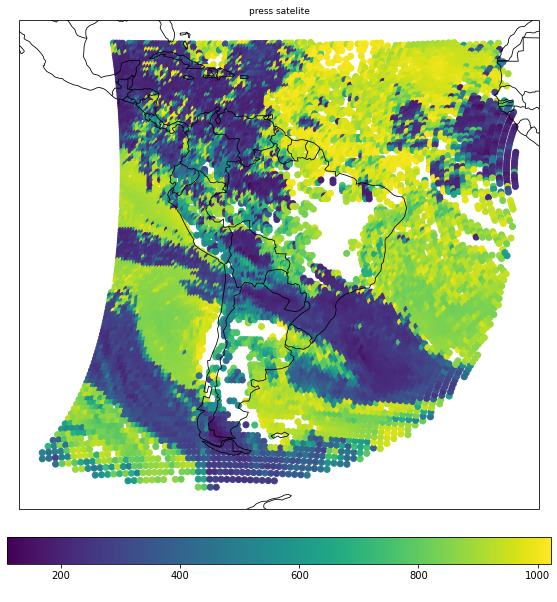

In [32]:
# ==================== CRIANDO PLOTS ==========================================

# plt.scatter(arquivo['lon'], arquivo['lat'], c = arquivo['press_sat'], cmap = 'viridis')
# plt.colorbar()
# plt.title('PRESSAO EXTRAIDA DA IMAGEM')

projection = ccrs.PlateCarree()

fig,ax = plt.subplots(1,1,subplot_kw={'projection': projection}, 
                      sharex = False, sharey = False ,figsize = (10,10)  )
fig.patch.set_facecolor('white')

# ==========================================================================================
# ------------------- Plot 1 ---------------------------

ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linewidth = 0.8)
#ax[1,1].add_geometries(shapefile.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='k')
ax.add_feature(cartopy.feature.BORDERS, edgecolor = 'black', linewidth = 0.8)

img= ax.scatter(arquivo['lon'], arquivo['lat'], c = arquivo['PRESS_SAT'], cmap = "viridis", label = "")
#Press_media_frio_10%    #PRESS_SAT
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label(' ')

ax.set_title('press satelite', fontsize = 9, loc = 'center') 
#plt.savefig('map press nc GOES ACHP.png', bbox_inches='tight', pad_inches=0, dpi=300)


Text(0.5, 1.0, 'press amv inpe')

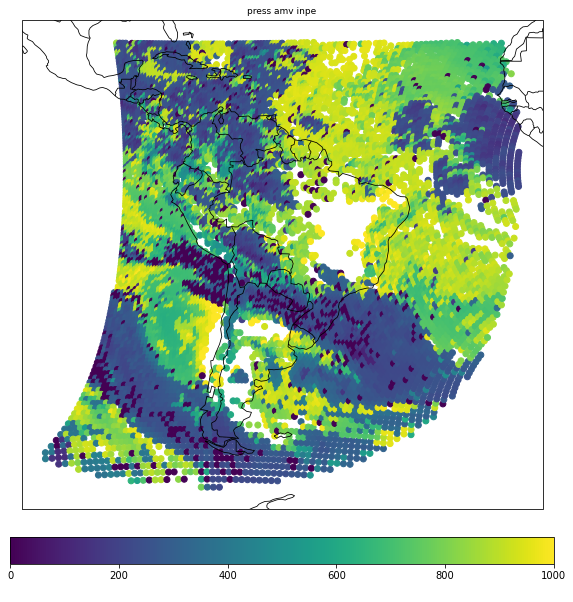

In [28]:
# plt.figure(figsize = (15,15))
# plt.scatter(arquivo['lon'], arquivo['lat'], c = arquivo['press'], cmap = 'viridis')
# plt.colorbar()
# plt.title('PRESSAO AMV INPE')

from cartopy.mpl.geoaxes import GeoAxes

projection = ccrs.PlateCarree()

fig,ax = plt.subplots(1,1,subplot_kw={'projection': projection}, 
                      sharex = False, sharey = False ,figsize = (10,10)  )
fig.patch.set_facecolor('white')

# ==========================================================================================
# ------------------- Plot 1 ---------------------------

ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linewidth = 0.8)
#ax[1,1].add_geometries(shapefile.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='k')
ax.add_feature(cartopy.feature.BORDERS, edgecolor = 'black', linewidth = 0.8)

img= ax.scatter(arquivo['lon'], arquivo['lat'], c = arquivo['press'], cmap = "viridis", label = "")

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label(' ')

ax.set_title('press amv inpe', fontsize = 9, loc = 'center') 
#plt.savefig('map press AMV INPE.png', bbox_inches='tight', pad_inches=0, dpi=300)


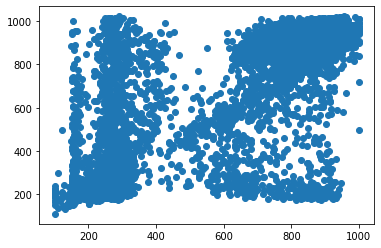

In [6]:
#arquivo = arquivo.dropna()
#arquivo = arquivo[arquivo['qi'] > 0.6]

plt.scatter(arquivo['press'], arquivo['PRESS_SAT'])
#plt.savefig('GRAFICO DE DISPERSÃO PRESS_INPExPRESS_ACHP.png', bbox_inches='tight', pad_inches=0, dpi=300)
